Задание: Линейная регрессия: прогноз оклада по описанию вакансии

In [2]:
# 1 Загрузите данные об описаниях вакансий и соответствующих годовых зарплатах из файла salary-train.csv.
from pandas import read_csv
x = read_csv('salary-train.csv')

In [8]:
# 2.1 Приведите тексты к нижнему регистру (text.lower()).
# 2.2 Замените все, кроме букв и цифр, на пробелы — это облегчит дальнейшее разделение текста на слова.
#  Для такой замены в строке text подходит следующий вызов: re.sub('[^a-zA-Z0-9]', ' ', text). 
#  Также можно воспользоваться методом replace у DataFrame, чтобы сразу преобразовать все тексты:
cf, cl, cc, cs = 'FullDescription', 'LocationNormalized', 'ContractTime', 'SalaryNormalized'
xf = x[cf].str.lower().replace('[^a-zA-Z0-9]', ' ', regex=True)
print(x[cf][:1], '\n', xf[:1])

0    International Sales Manager London ****k  ****...
Name: FullDescription, dtype: object 
 0    international sales manager london     k      ...
Name: FullDescription, dtype: object


In [9]:
# 2.3 Примените TfidfVectorizer для преобразования текстов в векторы признаков. 
# Оставьте только те слова, которые встречаются хотя бы в 5 объектах
from sklearn import feature_extraction
v = feature_extraction.text.TfidfVectorizer(min_df=5)
xv = v.fit_transform(xf)
#vn = v.get_feature_names()
print(type(xv[0]))
locals()['xv']

<class 'scipy.sparse.csr.csr_matrix'>


<60000x22861 sparse matrix of type '<class 'numpy.float64'>'
	with 8365759 stored elements in Compressed Sparse Row format>

In [10]:
# 2.4 Замените пропуски в столбцах LocationNormalized и ContractTime на специальную строку 'nan'.
x[cl].fillna('nan', inplace=True)
x[cc].fillna('nan', inplace=True)
print(len(x[cc][x[cc] == 'nan']), len(x[cc]))

15582 60000


In [11]:
# 2.5 Примените DictVectorizer для получения one-hot-кодирования признаков LocationNormalized и ContractTime.
d = feature_extraction.DictVectorizer()
xd = d.fit_transform(x[[cl, cc]].to_dict('records'))
print(xd[:2])

  (0, 2)	1.0
  (0, 957)	1.0
  (1, 2)	1.0
  (1, 957)	1.0


In [12]:
# 2.6 Объедините все полученные признаки в одну матрицу "объекты-признаки".
#  Обратите внимание, что матрицы для текстов и категориальных признаков являются разреженными
from scipy.sparse import hstack
xm = hstack([xv, xd])
locals()['xm']

<60000x24627 sparse matrix of type '<class 'numpy.float64'>'
	with 8485759 stored elements in COOrdinate format>

In [13]:
# 3 Обучите гребневую регрессию с параметром alpha=1. Целевая переменная записана в столбце SalaryNormalized.
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(xm, x[cs])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [15]:
# 4. Постройте прогнозы для двух примеров из файла salary-test-mini.csv.
#  Значения полученных прогнозов являются ответом на задание. Укажите их через пробел.
t = read_csv('salary-test-mini.csv')
tf = t[cf].str.lower().replace('[^a-zA-Z0-9]', ' ', regex=True)
tv = v.transform(tf)
td = d.transform(t[[cl, cc]].to_dict('records'))
p = clf.predict(hstack([tv, td]))
print(p)

[ 56582.43527444  37205.49915892]


In [18]:
import sys
sys.path.append('../..')
from lib import *
pf('10', pp(p.round(2)))

10="56582.44 37205.5"



In [7]:
x.head(2)

,FullDescription,LocationNormalized,ContractTime,SalaryNormalized
0,International Sales Manager London ****k ****...,London,permanent,33000
1,An ideal opportunity for an individual that ha...,London,permanent,50000


In [19]:
!cat 10.txt

56582.44 37205.5

In [22]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


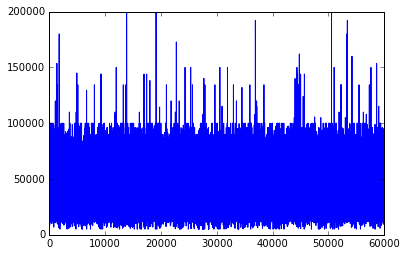

In [23]:
plot(x[cs])

In [29]:
?Ridge

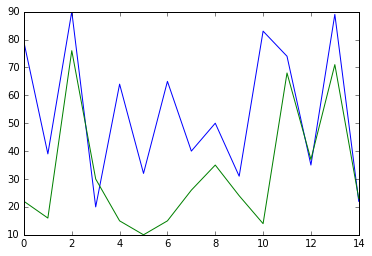

In [96]:
%matplotlib inline
import math
a = [ [randint(5,95) for j in range(0,2)] for i in range(0, 15)]
# spy(a)
plot(a)

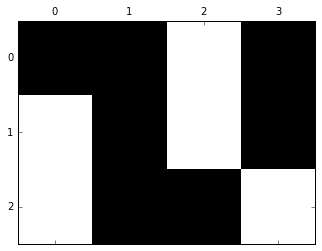

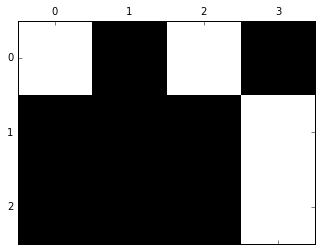

In [97]:
ms = np.random.randint(0, 2, (2, 3, 4))
for m in ms:
    plt.figure()
    plt.spy(m)

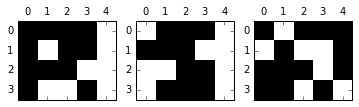

In [52]:
ms = np.random.randint(0, 2, (3, 4, 5))
f, axes = plt.subplots(1, 3)  # 1 row, 5 columns
for ax, m in zip(axes, ms):
    ax.spy(m)